In [44]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk, binary_dilation, binary_erosion, rectangle
from skimage.filters import threshold_otsu
from skimage.transform import rescale

Pretty printing has been turned ON


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

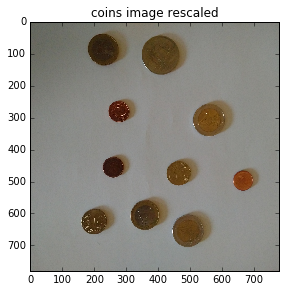

In [45]:
Path = './images/'
image_name = 'coins.jpg'
c_im = imread(Path.__add__(image_name))
c_im = img_as_ubyte(c_im)
c_im = rescale(c_im,0.25)

imshow(c_im)
plt.title('coins image rescaled')

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

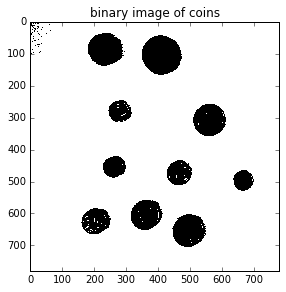

In [46]:
c_im = rgb2gray(c_im)

from skimage import filters
thresh = filters.threshold_otsu(c_im)
b = c_im > thresh

imshow(b)
plt.title('binary image of coins')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

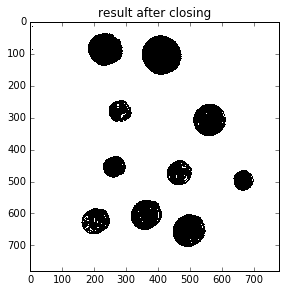

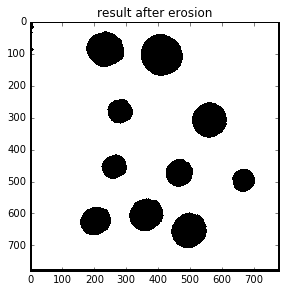

In [47]:
b_close = binary_closing(b)
plt.figure()
imshow(b_close)
plt.title('result after closing')

from skimage import morphology
b_close_erode = morphology.binary_erosion(b_close,selem=disk(4))
plt.figure()
imshow(b_close_erode)
plt.title('result after erosion')

Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

the number of regions is: 1


C:\Users\mohitkumarahuja\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


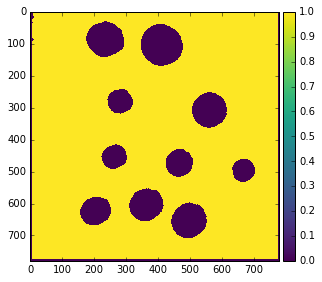

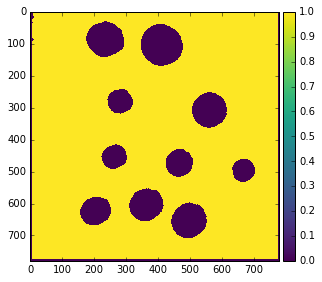

In [48]:
from skimage.draw import circle_perimeter

l_img, num = label(b_close_erode,return_num=True)
print("the number of regions is: %d"%num )
plt.figure()
imshow(l_img)
props = regionprops(l_img)

for idx in range(num-1):
    if idx == 0:
        continue
    radius = (props[idx].equivalent_diameter)/2.
    if radius > 30:
        area = props[idx].convex_area
        print("the radius of region is %d pxs " %radius)
        print("the area of region is %d pxs" %area)
        c_centroid = props[idx].centroid
        c_coord = circle_perimeter(int(c_centroid[0]),int(c_centroid[1]),int(radius))
        l_img[c_coord[0],c_coord[1]] = 255
    
plt.figure()
imshow(l_img)






#########     I Don't know Why the number of regions is: 1 rather than 12.   #################
#########          I have tried many times but its not working.             #################
 




## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

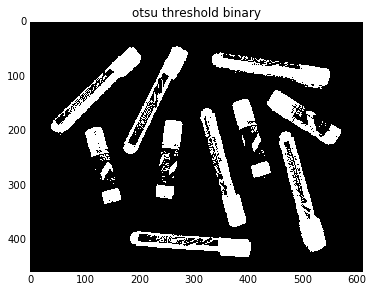

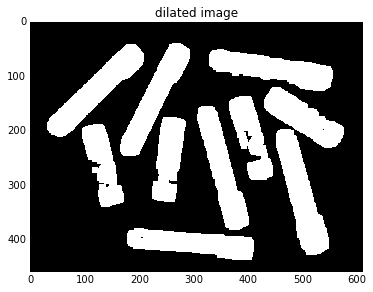

In [49]:
i_name = 'objets4.jpg'
o_im = imread(Path.__add__(image_name))
o_im = img_as_ubyte(o_im)
o_im  =rgb2gray(o_im)

#to convert to binary
t1 = threshold_otsu(o_im)
b1 = objects_im < t1

plt.figure()
imshow(b1)
plt.title('otsu threshold binary')

#for filling holes
b1_close = binary_dilation(b1, selem = rectangle(11,12))
plt.figure()
imshow(b1_close)
plt.title('dilated image')

In [50]:
l_img, num = label(b1_close,return_num=True)

print("the number of objects are: %d"%num )

props = regionprops(l_img)

marker = 0
gum = 0

for i in range(num):
    area = props[i].convex_area
    if area > 9000: #markers have area greater than 9000pxs
        marker +=  1
    else: #others are gums
        gum += 1

print("The number of markers are : %d"%marker)
print("The number of gum are : %d"%gum)

the number of objects are: 10
The number of markers are : 6
The number of gum are : 4
